In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('labelled.csv')
data = data.drop(columns=['Unnamed: 0'])

In [3]:
data

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,Federal-gov,Local-gov,...,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,cluster
0,25,226802,7,1,0,0,40,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,34,198693,6,1,0,0,30,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,24,369667,10,0,0,0,40,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,26,82091,9,0,0,0,39,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,20,444554,10,1,0,0,25,1,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14707,30,345898,9,1,0,0,46,1,0,0,...,0,0,0,0,0,0,0,0,0,1
14708,65,99359,15,1,1086,0,60,1,0,0,...,0,0,0,0,1,0,0,0,0,1
14709,32,116138,14,1,0,0,11,1,0,0,...,0,0,0,0,0,0,0,1,0,1
14710,22,310152,10,1,0,0,40,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [4]:
unlabel_test = pd.read_csv('test_new.csv')
unlabel_test = unlabel_test.drop(columns=['Unnamed: 0'])

X_unlabelled = unlabel_test.drop(columns=['income'])
y_unlabelled = unlabel_test['income']



# baseline decision tree

Within cluster Test Accuracy: 0.9446143391097519
Confusion Matrix:
[[  54   71]
 [  92 2726]]
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.37      0.43      0.40       125
        >50K       0.97      0.97      0.97      2818

    accuracy                           0.94      2943
   macro avg       0.67      0.70      0.68      2943
weighted avg       0.95      0.94      0.95      2943



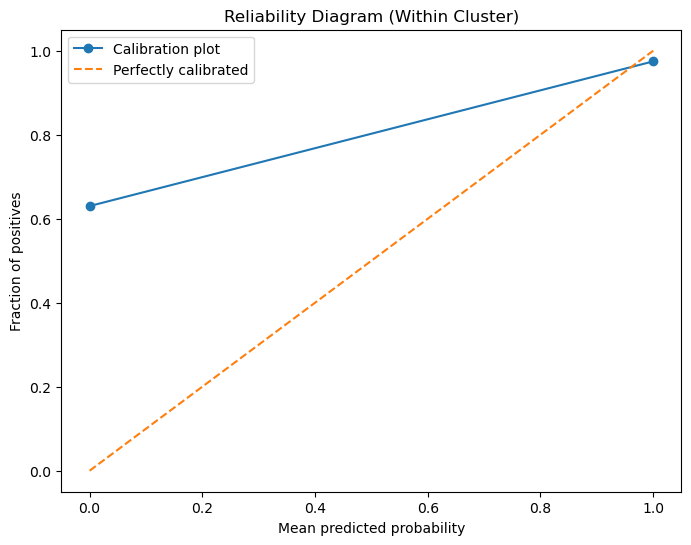

feature importance
Feature Importances:
                  Feature  Importance
4            capital-gain    0.276108
1                  fnlwgt    0.222908
0                     age    0.131830
2         educational-num    0.094378
6          hours-per-week    0.074826
5            capital-loss    0.043455
36         Prof-specialty    0.024296
3                  gender    0.018879
22          Not-in-family    0.014205
38                  Sales    0.013131
39           Tech-support    0.011878
9                 Private    0.011266
30        Exec-managerial    0.010212
27           Adm-clerical    0.007941
11       Self-emp-not-inc    0.006256
24              Own-child    0.005613
37        Protective-serv    0.004830
7             Federal-gov    0.004604
25              Unmarried    0.004569
34          Other-service    0.004265
8               Local-gov    0.003683
12              State-gov    0.002717
10           Self-emp-inc    0.002538
23         Other-relative    0.001563
40       T

/usr/lib64/python3.11/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/lib64/python3.11/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


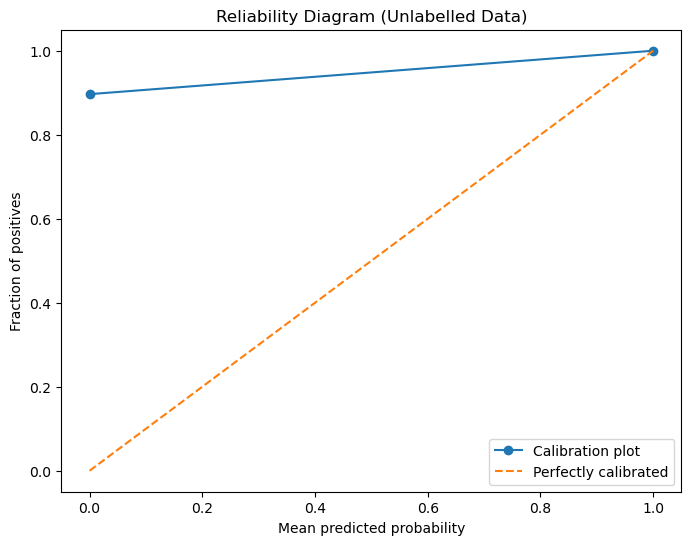

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Split the data into features and labels
X = data.drop(columns=['income'])
y = data['income']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the decision tree model
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Within cluster Test Accuracy:", accuracy)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate other scores (precision, recall, F1 score, support)
report = classification_report(y_test, y_pred, target_names=['<=50K', '>50K'])
print("Classification Report:")
print(report)

# Calculate reliability diagram for calibration
prob_pos = model.predict_proba(X_test_scaled)[:, 1]
prob_true, prob_pred = calibration_curve(y_test, prob_pos, n_bins=10)

# Plot the reliability diagram
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Calibration plot')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Reliability Diagram (Within Cluster)')
plt.legend()
plt.show()

print('feature importance')
# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Create a DataFrame to display the feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

print("Predictions on unseen data from the unlabelled cluster")
# Make predictions on the unlabelled test data

y_pred_unlabelled = model.predict(X_unlabelled)

# Calculate accuracy on the unlabelled test data
accuracy_unlabelled = accuracy_score(y_unlabelled, y_pred_unlabelled)
print("Unlabelled Data Test Accuracy:", accuracy_unlabelled)

# Calculate confusion matrix for unlabelled data
cm_unlabelled = confusion_matrix(y_unlabelled, y_pred_unlabelled)
print("Confusion Matrix (Unlabelled Data):")
print(cm_unlabelled)

# Calculate other scores (precision, recall, F1 score, support) for unlabelled data
report_unlabelled = classification_report(y_unlabelled, y_pred_unlabelled, target_names=['<=50K', '>50K'])
print("Classification Report (Unlabelled Data):")
print(report_unlabelled)

# Calculate reliability diagram for unlabelled data calibration
prob_pos_unlabelled = model.predict_proba(X_unlabelled)[:, 1]
prob_true_unlabelled, prob_pred_unlabelled = calibration_curve(y_unlabelled, prob_pos_unlabelled, n_bins=10)

# Plot the reliability diagram for unlabelled data
plt.figure(figsize=(8, 6))
plt.plot(prob_pred_unlabelled, prob_true_unlabelled, marker='o', label='Calibration plot')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Reliability Diagram (Unlabelled Data)')
plt.legend()
plt.show()

# baseline random forest

Within cluster Test Accuracy: 0.9683995922528033
Confusion Matrix:
[[  48   77]
 [  16 2802]]
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.75      0.38      0.51       125
        >50K       0.97      0.99      0.98      2818

    accuracy                           0.97      2943
   macro avg       0.86      0.69      0.75      2943
weighted avg       0.96      0.97      0.96      2943



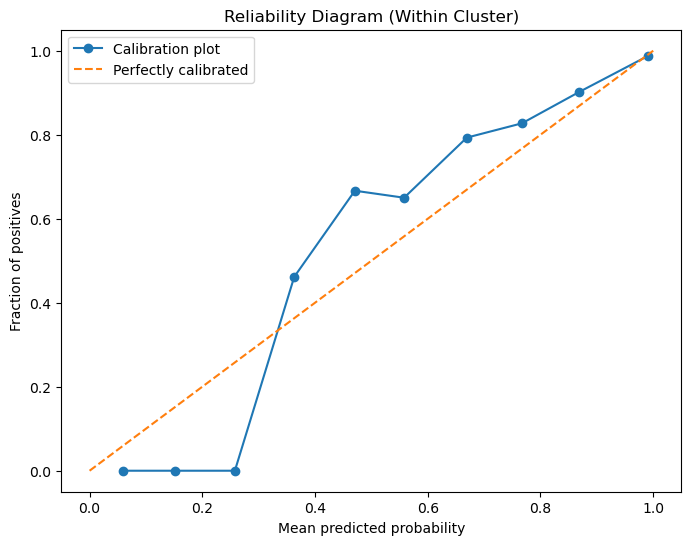

feature importance
Feature Importances:
                  Feature    Importance
4            capital-gain  2.210310e-01
1                  fnlwgt  1.913947e-01
0                     age  1.635203e-01
2         educational-num  1.112307e-01
6          hours-per-week  1.049903e-01
5            capital-loss  4.125156e-02
3                  gender  2.215456e-02
36         Prof-specialty  1.849829e-02
22          Not-in-family  1.381093e-02
30        Exec-managerial  1.297160e-02
9                 Private  1.131813e-02
24              Own-child  9.794908e-03
38                  Sales  7.521374e-03
11       Self-emp-not-inc  7.349016e-03
8               Local-gov  6.729252e-03
12              State-gov  6.029522e-03
27           Adm-clerical  6.023321e-03
7             Federal-gov  5.522944e-03
39           Tech-support  5.212800e-03
25              Unmarried  5.124538e-03
10           Self-emp-inc  4.781165e-03
29           Craft-repair  4.343178e-03
34          Other-service  4.276555e-03


/usr/lib64/python3.11/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/lib64/python3.11/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


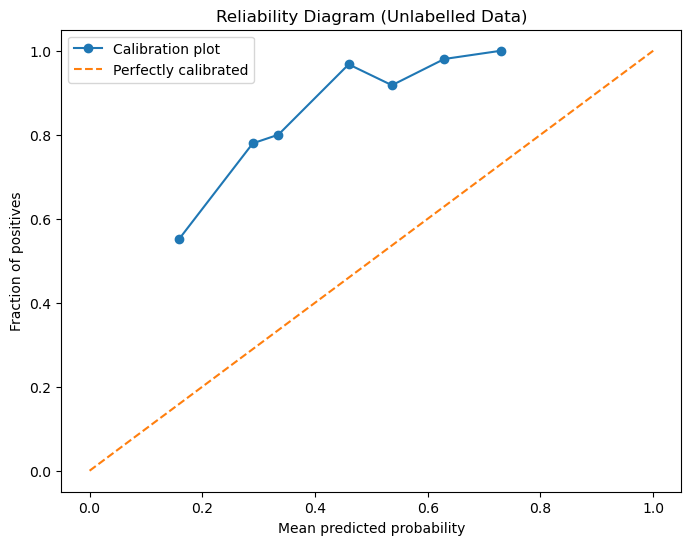

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into features and labels
X = data.drop(columns=['income'])
y = data['income']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Random Forest classifier
model = RandomForestClassifier(n_estimators=50, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Within cluster Test Accuracy:", accuracy)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate other scores (precision, recall, F1 score, support)
report = classification_report(y_test, y_pred, target_names=['<=50K', '>50K'])
print("Classification Report:")
print(report)

# Calculate reliability diagram for calibration
prob_pos = model.predict_proba(X_test_scaled)[:, 1]
prob_true, prob_pred = calibration_curve(y_test, prob_pos, n_bins=10)

# Plot the reliability diagram
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Calibration plot')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Reliability Diagram (Within Cluster)')
plt.legend()
plt.show()

print('feature importance')
feature_importances = model.feature_importances_

# Create a DataFrame to display the feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

print("Predictions on unseen data from the unlabelled cluster")
# Make predictions on the unlabelled test data

y_pred_unlabelled = model.predict(X_unlabelled)

# Calculate accuracy on the unlabelled test data
accuracy_unlabelled = accuracy_score(y_unlabelled, y_pred_unlabelled)
print("Unlabelled Data Test Accuracy:", accuracy_unlabelled)

# Calculate confusion matrix for unlabelled data
cm_unlabelled = confusion_matrix(y_unlabelled, y_pred_unlabelled)
print("Confusion Matrix (Unlabelled Data):")
print(cm_unlabelled)

# Calculate other scores (precision, recall, F1 score, support) for unlabelled data
report_unlabelled = classification_report(y_unlabelled, y_pred_unlabelled, target_names=['<=50K', '>50K'])
print("Classification Report (Unlabelled Data):")
print(report_unlabelled)

# Calculate reliability diagram for unlabelled data calibration
prob_pos_unlabelled = model.predict_proba(X_unlabelled)[:, 1]
prob_true_unlabelled, prob_pred_unlabelled = calibration_curve(y_unlabelled, prob_pos_unlabelled, n_bins=10)

# Plot the reliability diagram for unlabelled data
plt.figure(figsize=(8, 6))
plt.plot(prob_pred_unlabelled, prob_true_unlabelled, marker='o', label='Calibration plot')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Reliability Diagram (Unlabelled Data)')
plt.legend()
plt.show()

# baseline logistic regression

Within cluster Test Accuracy: 0.9663608562691132
Confusion Matrix:
[[  38   87]
 [  12 2806]]
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.76      0.30      0.43       125
        >50K       0.97      1.00      0.98      2818

    accuracy                           0.97      2943
   macro avg       0.86      0.65      0.71      2943
weighted avg       0.96      0.97      0.96      2943



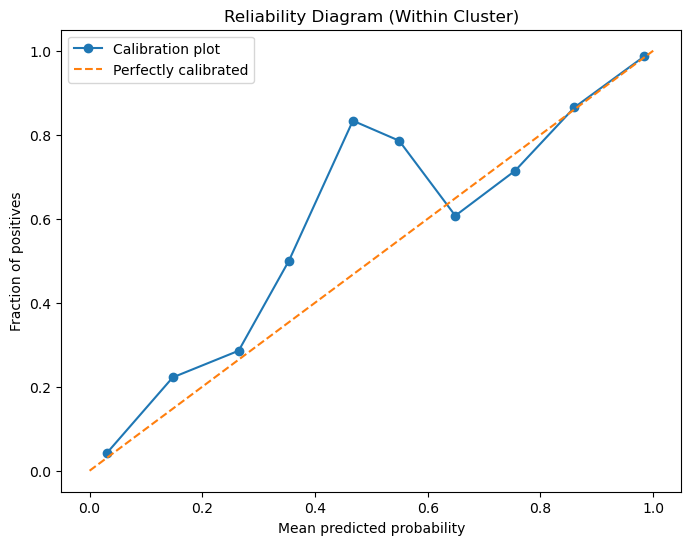

Predictions on unseen data from the unlabelled cluster
Unlabelled Data Test Accuracy: 0.10281984977219555
Confusion Matrix (Unlabelled Data):
[[ 835    0]
 [7286    0]]
Classification Report (Unlabelled Data):
              precision    recall  f1-score   support

       <=50K       0.10      1.00      0.19       835
        >50K       0.00      0.00      0.00      7286

    accuracy                           0.10      8121
   macro avg       0.05      0.50      0.09      8121
weighted avg       0.01      0.10      0.02      8121



/usr/lib64/python3.11/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/lib64/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/lib64/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/lib64/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` par

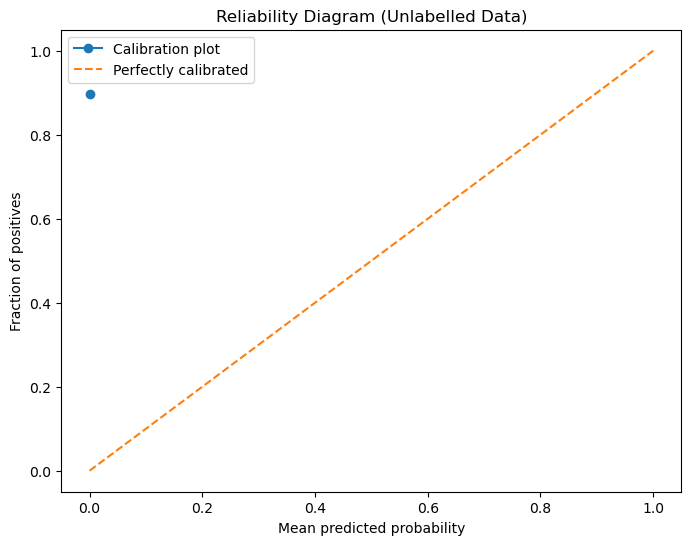

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.calibration import calibration_curve
# Split the data into features and labels
X = data.drop(columns=['income'])
y = data['income']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Within cluster Test Accuracy:", accuracy)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate other scores (precision, recall, F1 score, support)
report = classification_report(y_test, y_pred, target_names=['<=50K', '>50K'])
print("Classification Report:")
print(report)

# Calculate reliability diagram for calibration
prob_pos = model.predict_proba(X_test_scaled)[:, 1]
prob_true, prob_pred = calibration_curve(y_test, prob_pos, n_bins=10)

# Plot the reliability diagram
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Calibration plot')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Reliability Diagram (Within Cluster)')
plt.legend()
plt.show()

print("Predictions on unseen data from the unlabelled cluster")
# Make predictions on the unlabelled test data

y_pred_unlabelled = model.predict(X_unlabelled)

# Calculate accuracy on the unlabelled test data
accuracy_unlabelled = accuracy_score(y_unlabelled, y_pred_unlabelled)
print("Unlabelled Data Test Accuracy:", accuracy_unlabelled)

# Calculate confusion matrix for unlabelled data
cm_unlabelled = confusion_matrix(y_unlabelled, y_pred_unlabelled)
print("Confusion Matrix (Unlabelled Data):")
print(cm_unlabelled)

# Calculate other scores (precision, recall, F1 score, support) for unlabelled data
report_unlabelled = classification_report(y_unlabelled, y_pred_unlabelled, target_names=['<=50K', '>50K'])
print("Classification Report (Unlabelled Data):")
print(report_unlabelled)

# Calculate reliability diagram for unlabelled data calibration
prob_pos_unlabelled = model.predict_proba(X_unlabelled)[:, 1]
prob_true_unlabelled, prob_pred_unlabelled = calibration_curve(y_unlabelled, prob_pos_unlabelled, n_bins=10)

# Plot the reliability diagram for unlabelled data
plt.figure(figsize=(8, 6))
plt.plot(prob_pred_unlabelled, prob_true_unlabelled, marker='o', label='Calibration plot')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Reliability Diagram (Unlabelled Data)')
plt.legend()
plt.show()

In [8]:
np.average([0.0, 6.181607039171022, 0.0, 93.81839296082897, 0.0, 0.0, 0.0, 0.0, 100.0, 0.0, 6.181607039171022, 0.0, 6.181607039171022, 100.0, 6.181607039171022, 100.0, 93.81839296082897, 100.0, 0.0, 0.0, 100.0, 100.0, 100.0, 6.181607039171022, 100.0, 100.0, 0.0, 0.0, 93.81839296082897, 0.0, 0.0, 93.81839296082897, 6.181607039171022, 100.0, 6.181607039171022, 6.181607039171022, 0.0, 93.81839296082897, 0.0, 100.0, 100.0, 100.0, 100.0, 0.0, 93.81839296082897, 0.0, 100.0, 0.0, 100.0, 100.0])

NameError: name 'np' is not defined

In [ ]:
import numpy as np